# **BUSI 488 / COMP 488 Data Science in the Business World**
## *Spring 2023*  
Daniel M. Ringel  
Kenan-Flagler Business School  
*The University of North Carolina at Chapel Hill*  
dmr@unc.edu

## Class12 - Predictive Modelling II: Classification
*February 23, 2023*  
Version 1.5


# Today's Agenda


1. **SciKit-Learn Roadmap**

2. **Dr. D's Amazin' Grocery Store**   
    ●  Data Pre-Processing

3. **Predicting Customer Segments using Machine Learning**  
    ● Supervised vs. Unsupervised Machine Learning  
    ● K-Nearest Neighbors (KNN)

4. **Improving our Prediction**

    ● Stratifying our test and train samples

    ● Training set size     

    ● Overfitting and Underfitting
    
    ● Re-scaling the data. 


### *Prep-Check:*
- Reviewed notebook of class 12
- Submitted XP for DataCamp HW5 on Canvas

# 1. Roadmap from SciKit-Learn
![roadmap](https://scikit-learn.org/stable/_static/ml_map.png)
https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html  
For an overview on supervised learning methods in the scikit-learn library: https://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html


# 2. Dr. D's Amazin' Grocery Store

It has been few years since Dr. D. launched his Amazin’ Bookstore. Thanks to the great data science talent he recruited from UNC, Dr. D’s bookstore is a huge success. Therefore, Dr. D. decided to expand into groceries. He launched his Amazin’ Grocery Store and immediately started to collect data on his customers (using a loyalty program where they only need to supply their phone number at check-out). He was also able to segment his existing customer base, which enables him to target them much more effectively with promotions that they might be interested in (using the appropriate medium).

The segmentation of his customers is a manual process at this time.  Dr. D. has to hire experts from a renown consulting firm (Accidenture) every couple of years for USD 3500 per consultant per day plus travel expenses. Usually, the team of 2 consultants finishes their work within a week. Accidenture discovered 3 customer segment and classifies all existing customers for Dr. D. in his customer database. 

Clearly, Dr. D. would rather go on a (very!) nice vacation than pay that much money to Accidenture for the segmentation of his customers. He therefore decided that he should use the power of data science and AI to automatically assign **new customers** to the appropriate segment (after some data was collected on them). 

He put **YOU** in charge of the task and provided you with a dataset of customer records. The dataset contains the following information:

- CustomerID
- Name of Customer
- Nickname of Customer
- Average monthly spending in USD (i.e., revenue)
- Average number of shopping trips to his grocery store
- Average basket size per shopping trip (i.e., number of SKUs purchased on a trip)
- The share of private label products bought by the customer
- The share of organic products bought by the customer
- Whether a customer actively uses the store’s own credit card or not
- The segment each customer was assigned to by Accidenture 

**Let's see if we can save Dr. D. thousands of dollars by automating the assignment of new customers to the three customers segments using Machine Learning techniques!**

## 2.1 Data Pre-Processing

Before we can start, we need to:
- Import Dr. D's Dataset (a csv file)
- Inspect it 
- Make sure the data types are suitable for our purpose
- Determine which variables are relevant for our prediction task
- Extract the response and feature variables
- Visually inspect our response variables to see what is going on in the data

### 2.1.1 Import Dr. D's Dataset (a csv file)

In [ ]:
# 0a Connect our Google Drive and switch to the folder that contains our data 
from google.colab import drive
drive.mount('/content/gdrive')

# 0b Change permanently into directory where data files are located
%cd /content/gdrive/MyDrive/488/Class13

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/488/Class13


In [ ]:
# 0c See files that are in the current directory
# special shell command to view the files in the home directory of the notebook environment (! command has no lasting effect)
!ls 

 488_2023_Class13.ipynb  'DrDsAmazinGroceryStore1 (1).csv'


**A note on shell commands in python notebooks:** The difference between **!** and **%**

- **!** calls out to a shell (in a new process), 
- **%** affects the process associated with the notebook (or the notebook itself)
- many **%** commands have no shell counterpart.

***!cd foo***, by itself, has no lasting effect, since the process with the changed directory immediately terminates.

***%cd foo*** changes the current directory of the notebook process, which is a lasting effect.

In [ ]:
# 1a Import Pandas so we can load our data into a dataframe
import pandas as pd

# 1b import the data file
customers_df = pd.read_csv("DrDsAmazinGroceryStore1 (1).csv") 

# 1c Take a look at the first 5 rows
customers_df.head()

,CustomerID,CustomerName,CustomerNick,Spending,Basket,Trips,PLabel,Organic,Segment,StoreCC
0,1128333,"Cole, Pearl",.,297.48,9.3,5.2,2.9,37.7,Yuppies,0
1,1174706,"Brooks, Lucy",Lulu,324.38,8.0,14.6,19.1,21.7,Seniors,0
2,1221082,"Hamilton, Luke",.,379.40,8.6,14.0,19.5,28.9,Seniors,1
3,1267459,"Ringel, Daniel",.,425.18,9.0,15.1,32.2,34.9,Families,1
4,1313836,"Griffiths, Christina",Christa,305.18,11.5,4.3,3.0,31.6,Yuppies,0


### 2.1.2 Inspect the data we have available

In [ ]:
# 2 Let's take a look at the summary of the data
customers_df.describe()

,CustomerID,Spending,Basket,Trips,PLabel,Organic,StoreCC
count,1.440000e+02,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000
mean,4.147158e+06,346.502153,9.922917,10.874306,18.679167,24.410417,0.513889
std,1.614941e+06,55.176086,2.990281,5.444144,11.288480,7.565164,0.501552
min,1.128333e+06,213.000000,6.000000,2.900000,1.400000,10.300000,0.000000
25%,2.786248e+06,299.505000,8.400000,4.800000,5.625000,18.000000,0.000000
50%,4.380714e+06,347.440000,9.200000,12.100000,20.900000,23.050000,1.000000
75%,5.471326e+06,385.620000,10.300000,15.650000,27.400000,30.225000,1.000000
max,6.832466e+06,477.730000,23.500000,20.800000,38.400000,47.800000,1.000000


### 2.1.3 Make sure the data types are suitable for our purpose  

- Which columns would be useful to predict which segment a customer belongs to?
- Can we use use the columns of interest in a machine learning model that predict's a customer's segment?

In [ ]:
# 3a Let's take a look at the data types
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CustomerID    144 non-null    int64  
 1   CustomerName  144 non-null    object 
 2   CustomerNick  144 non-null    object 
 3   Spending      144 non-null    float64
 4   Basket        144 non-null    float64
 5   Trips         144 non-null    float64
 6   PLabel        144 non-null    float64
 7   Organic       144 non-null    float64
 8   Segment       144 non-null    object 
 9   StoreCC       144 non-null    int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 11.4+ KB


In [ ]:
# 3b We know that we have catgorical data for Segment. We therefore typecast it as a categorical variable 
customers_df['Segment'] = customers_df['Segment'].astype('category')

# 3c Now we need to translate segment names to numbers that can be understood by a ML algorithm
customers_df['SegID'] = customers_df['Segment'].cat.codes
customers_df.head()

,CustomerID,CustomerName,CustomerNick,Spending,Basket,Trips,PLabel,Organic,Segment,StoreCC,SegID
0,1128333,"Cole, Pearl",.,297.48,9.3,5.2,2.9,37.7,Yuppies,0,2
1,1174706,"Brooks, Lucy",Lulu,324.38,8.0,14.6,19.1,21.7,Seniors,0,1
2,1221082,"Hamilton, Luke",.,379.40,8.6,14.0,19.5,28.9,Seniors,1,1
3,1267459,"Ringel, Daniel",.,425.18,9.0,15.1,32.2,34.9,Families,1,0
4,1313836,"Griffiths, Christina",Christa,305.18,11.5,4.3,3.0,31.6,Yuppies,0,2


In [ ]:
# 3d Let's check the mean by segment for Share or organic products
customers_df.groupby(['Segment']).Organic.mean()

Segment
Families    18.334615
Seniors     23.330612
Yuppies     32.988372
Name: Organic, dtype: float64

### 2.1.4 Extract the response and feature variables 

- We only want to use the variables of interest for our prediction of customer segments. 
- These are the:
    - average monthly revenue (Revenue)
    - the average number of trips per month (Trips)
    - the average basket size (BasketSize)
    - the percent share of private label products (Plabel)
    - and the percent share of organic products (organic)    

*We will ignore the variable "StoreCC" for now.*

**Let's create two arrays for our prediciton problem:**
- The first array holds the segment data (our response variable).
- The second array holds the variables of interest (our feature variables).

In [ ]:
# 4 Create arrays for the features and the response variable
import numpy as np
y = customers_df['SegID'].values
X = customers_df.drop(['SegID', 'CustomerID', 'CustomerName', 'Segment','StoreCC', 'CustomerNick'], axis=1).values

print("Response Variable: ",y.shape)
print("Feature Variables: ",X.shape)

Response Variable:  (144,)
Feature Variables:  (144, 5)


### 2.1.5 Visual inspection of the data

Let's visually inspect how the features in our dataset relate to another!

***What can we already learn by just "eyeballing" the data?***

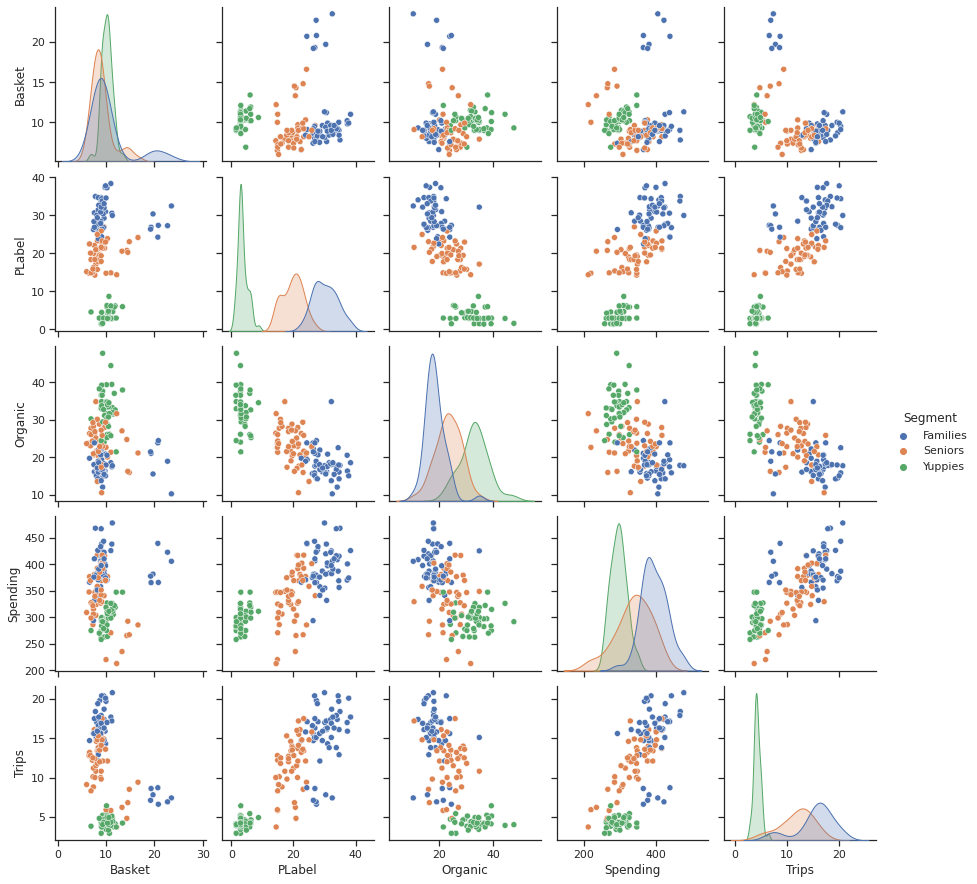

In [ ]:
# 5a Import seaborn library for visualizing data conveniently
import seaborn as sns

# 5b Construct a new dataframe that contains our response and feature variables as input to our plot
feature_df =  customers_df.drop(['SegID', 'CustomerID', 'CustomerName', 'Segment','StoreCC', 'CustomerNick'], axis=1) 
response_df = customers_df['Segment']

# 5c Join the dataframes
joint_df = pd.concat([response_df, feature_df], axis=1)

# 5d Create a matrix of scatter plots 
sns.set(style="ticks")
sns.pairplot(joint_df, vars=['Basket','PLabel','Organic', 'Spending','Trips'], hue='Segment')


# 3. Predicting Customer Segments using Machine Learning


## 3.1 We will use Supervised (Machine) Learning to solve Dr. D's problem

**Objective** of Supervised (Machine) Learning: Automate time-consuming or expensive manual tasks  

**Examples:**
- Doctor’s diagnosis
- Make predictions about the future
- Will a customer click on an ad or not?

**Requires:** Labeled data  
- Historical data with labels
- Experiments to get labeled data
- Crowd-sourcing labeled data

**Taks/Models:**
- Classification: should we target a consumer?
- Regression: how much revenue can we expect from a consumer?

**Binary vs. Multiclass Prediction**\
Today, firms largely use (are biased towards) classification models.  
The reason behind this bias towards classification models is that most analytical problems involve making a decision that requires a simple Yes/No answer:
 - Will a customer churn or not
 - Will a customer respond to ad campaign or not
 - Will the firm default or not  
In these cases, we use binary classification.

However, **it is also possible to predict multiple classes** at once! Instead of a Yes/No (i.e, positive vs. negative) prediction, a supervised classification model can also be trained to predict multiple classes (e.g., segment 1 vs. segment 2 vs. segment 3). We call this **multiclass prediction**, and we will use it to help Dr. D. segment new customers. 



## 3.2 The K-Nearest Neighborhod (KNN) Machine Learning Algorithm for Classification


### *Show me who your friends are, and I’ll tell you who you are*

The concept of KNN can hardly be described more simply. This is an old saying, which can be found in many languages and many cultures.


**Basic idea:** Predict the label of a data point by  
- Looking at the ‘k’ closest labeled data points
- Taking a majority vote  

**Underlying Principle**:
- Find a predefined number (k) training samples closest in distance to a new sample that has to be classified
- The label of the new sample will be defined from these neighbors
- KNN has a fixed user defined constant for the number of neighbors which have to be determined 


![KNN explained from www.python-course.eu/images/k_NN.png](http://www.python-course.eu/images/k_NN.png "KNN Intuition")


### 3.2.1 *Let's train a model that can predict to which segment a customer belongs using K-Nearest Neigbors (KNN)*

In [ ]:
# 0 Import from the sklearn library a function to split our data into a training and a testing sample
from sklearn.model_selection import train_test_split

# 1 Create a training and a test sample from the full data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=21)#, stratify=y)

# 2 Check if our sample is split as we expected
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))


# 3 import the k-nearest neighbors classifier from sci-kit learn
from sklearn.neighbors import KNeighborsClassifier

# 4 Instantiate the KNeighborsClassifier with a n_neighbors value of 3
knn = KNeighborsClassifier(n_neighbors=3)

# 5 Fit the model
knn.fit(X_train, y_train)

X_train shape: (72, 5)
y_train shape: (72,)
X_test shape: (72, 5)
y_test shape: (72,)


KNeighborsClassifier(n_neighbors=3)

### 3.2.2 So how good is our model at prediction to which segment a customer belongs?

***Let's predict the segment of all customers in our test data set and check how often our model was right!***

In [ ]:
# 1 Run prediction on test data
y_pred = knn.predict(X_test)
print("Test set predictions: \n {}".format(y_pred),"\n")

# 2 Calculate the accuracy of our prediction using np.mean
print("Accuracy of Predicition (Manual scoring): {:.2f}".format(np.mean(y_pred==y_test)))

# 3 Alternatively, we can use knn's internal score function
print("Accuracy of Predicition (KNN internal scoring): {:2f}".format(knn.score(X_test, y_test)))

# 4 Alternatively, we can import a library from sklearn
from sklearn.metrics import accuracy_score
print(f"Accuracy of Predicition (sklearn scoring): {round(accuracy_score(y_test, y_pred)*100,2)}%")

Test set predictions: 
 [2 2 0 1 2 2 0 1 1 2 1 2 0 1 1 1 0 0 2 0 1 0 0 1 2 2 0 2 1 1 0 2 1 0 0 2 2
 2 0 0 2 0 2 1 0 1 0 1 0 0 1 0 0 1 1 0 2 1 0 1 0 0 0 0 0 1 2 0 1 1 1 1] 

Accuracy of Predicition (Manual scoring): 0.75
Accuracy of Predicition (KNN internal scoring): 0.750000
Accuracy of Predicition (sklearn scoring): 75.0%


### 3.2.3 Predicting the segment of a new customer that we have no segment information on

- Basket_Size is 16
- Share_Private_Label is 25%
- Share_Organic is 25%
- Revenue is USD400
- Number of Trips are 6

In [ ]:
# 1 Let's create a new record and use our model that we have just built to predict the customers segment
x_new = np.array([[16, 25, 25, 400, 6]])

# 2 Now we can make a predition based on the new record (to show the segment name, we need to create a dict that translates segment label to segment name)
prediction = knn.predict(x_new)
replace_map = {'Segment': {2: 'Yuppies', 1: 'Seniors', 0: 'Families'}}
print("Predicted Segment: {}".format(replace_map.get('Segment', {}).get(prediction[0])))

Predicted Segment: Seniors


# 4. Improving our Prediction

**So how can we do better in our prediction?**  
There are a few things we can easily change:
- The distribtution of segments (labels) within the train and test samples
- The size of the testing sample
- The value for k
- The scales of the input data

## 4.1 Even Distribution of Labels
- We want to have the same distribution of labels in our training and testing sets
  - use stratify by dependent variable (here, y)

In [ ]:
# 1 Create a training and a test sample from the full data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=21, stratify=y)

# 2 Instantiate the KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=3)

# 3 Fit the model
knn.fit(X_train, y_train)

# 4 Make the prediction for the test set
y_pred = knn.predict(X_test)

# 5 And calculate the accuracy
print("Accuracy of Predicition: {:2f}".format(knn.score(X_test, y_test)))

Accuracy of Predicition: 0.875000


## 4.2 Size of Test Set
- The larger the testing set, the less data the classifier has to train on
  - Make test set smaller: How much?

In [ ]:
# 1 Create a training and a test sample from the full data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=21, stratify=y)

# 2 Instantiate the KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=3)

# 3 Fit the model
knn.fit(X_train, y_train)

# 4 Make the prediction for the test set
y_pred = knn.predict(X_test)

# 5 And calculate the accuracy
print("Accuracy of Predicition: {:2f}".format(knn.score(X_test, y_test)))

Accuracy of Predicition: 0.879310


## 4.3 Overfitting and Underfitting: Finding "k"

Changing k leads to different results. So what is the *right* value for k?

**Let's make the impact of setting k to different values visible:**
- Show boundaries of each class (i.e., segment) in a graph
- These "Decision Boundaries" separate our three segments from another 

### 4.3.1 Visualizing Decision Boundaries for KNN

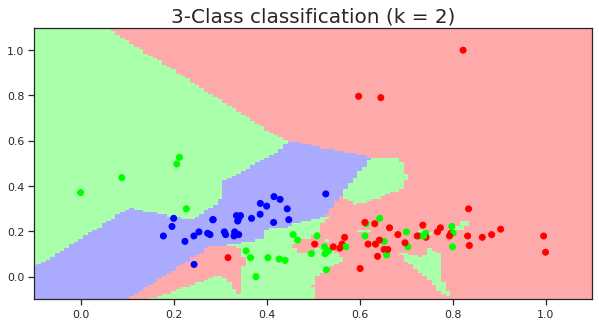

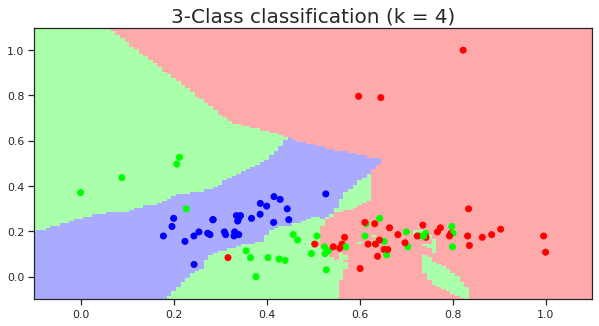

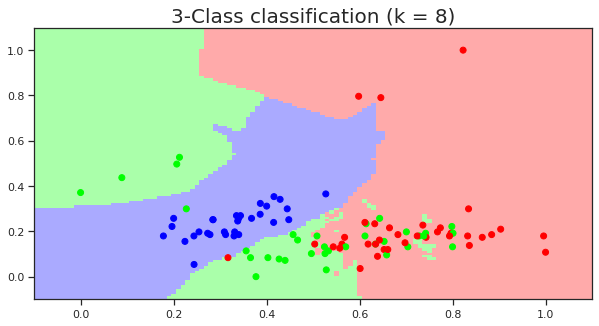

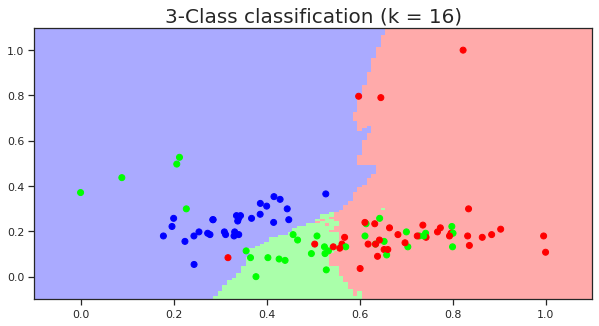

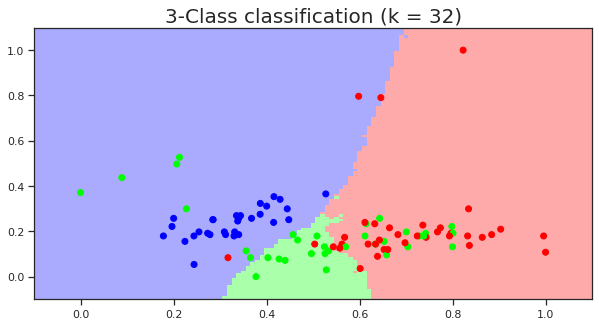

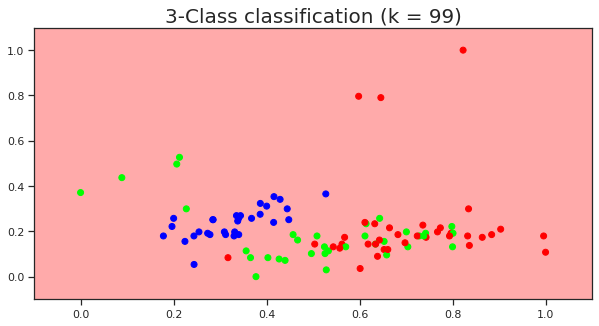

In [ ]:
# 0 Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale
from matplotlib.colors import ListedColormap
from sklearn import neighbors

# 1 First split the sample into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

# 2 Select features and set step size
X2 = minmax_scale(X_train[:, [0,1]])  # we only take the first two features and rescale them.                    
y2 = y_train
h = .01  # step size in the mesh

# 3 Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# 4 Plot for different values of k
for k in [2,4,8,16,32,99]:
    # 4a We create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)
    clf.fit(X2, y2)

    # 4b Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X2[:, 0].min() - .1, X2[:, 0].max() + .1
    y_min, y_max = X2[:, 1].min() - .1, X2[:, 1].max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # 4c Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(10,5))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

    # 4d Plot also the training points
    plt.scatter(X2[:, 0], X2[:, 1], c=y_train, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i)"
              % (k), fontsize=20)

plt.show()

### Study the above graphs carefully. What do you see as k get's larger?

- As k gets larger, the boundaries become smoother
- As k approaches the number of customers, the whole graph will take on a single color

### --> Model Complexity

- Larger k = smoother decision boundary = less complex model
- Smaller k = more complex model = can lead to overfiting

### 4.3.2 Overfitting and Underfitting

#### The goal of a good machine learning model is to generalize well from the training data to any data from the problem domain. 
- This allows us to make predictions in the future on data the model has never seen.

A model can be poorly trained by overfitting or underfitting the data:

- **Overfitting** 
    - Happens when a model learns the detail and noise in the training data to the extent that it negatively impacts the performance of the model on new data.   
    - An overfit model is one where performance on the train set is good and continues to improve, whereas performance on the validation set improves to a point and then begins to degrade.  
    

- **Underfitting** 
    - Refers to a model that can neither model the training data nor generalize to new data.   
    - If a model cannot generalize well to new data, then it cannot be leveraged for classification or prediction tasks. 
    - Generalization of a model to new data is ultimately what allows us to use machine learning algorithms every day to make predictions and classify data.
    - High bias and low variance are good indicators of underfitting. 

We can test to what extend different values of k overfit or underfit the data.  

We proceed as follows:
1. Compute and plot the training and testing accuracy scores for a variety of different neighbor values (k). 
2. Inspect how the accuracy scores differ for the training and testing sets with different values of k

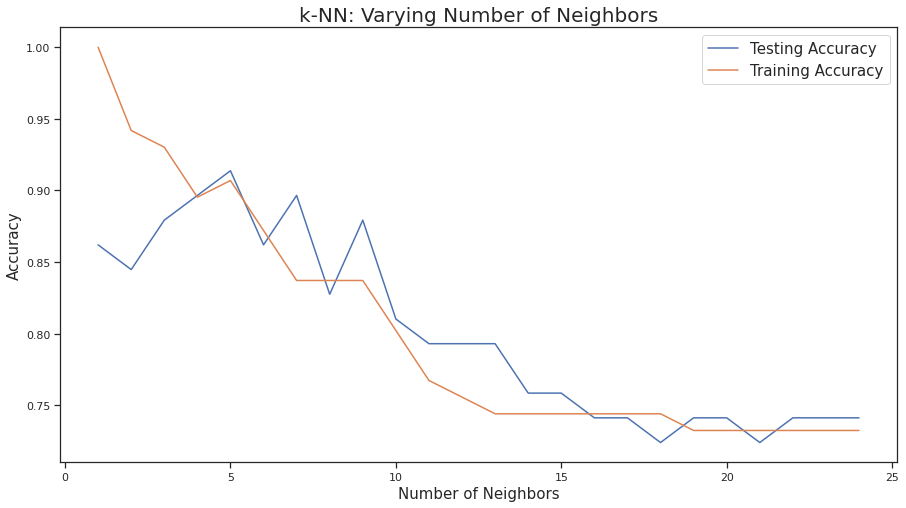

In [ ]:
# 1 First split the sample into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=21, stratify=y)

# 2 Setup arrays to store train and test accuracies
neighbors = np.arange(1, 25)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# 3 Loop over different values of k
for i, k in enumerate(neighbors):
    # 3a Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # 3b Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    # 3c Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    # 3d Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# 4 Generate plot
plt.figure(figsize=(15,8))
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend(fontsize=15)
plt.xlabel('Number of Neighbors', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.title('k-NN: Varying Number of Neighbors', fontsize=20)
plt.show()

In [ ]:
# 1 Instantiate the KNeighborsClassifier with an optimal n_neighbors value such that the model neither overfits nor underfits
knn = KNeighborsClassifier(n_neighbors=4)

# 2 Fit the model
knn.fit(X_train, y_train)

# 3 Make the prediction for the test set
y_pred = knn.predict(X_test)

# 4 And calculate the accuracy
print("Accuracy of Predicition: {:2f}".format(knn.score(X_test, y_test)))

Accuracy of Predicition: 0.896552


## 4.4 It appears that the features that may drive the segment memberships of customers are on different scales. 

What happens when we re-scale them to the same scale?

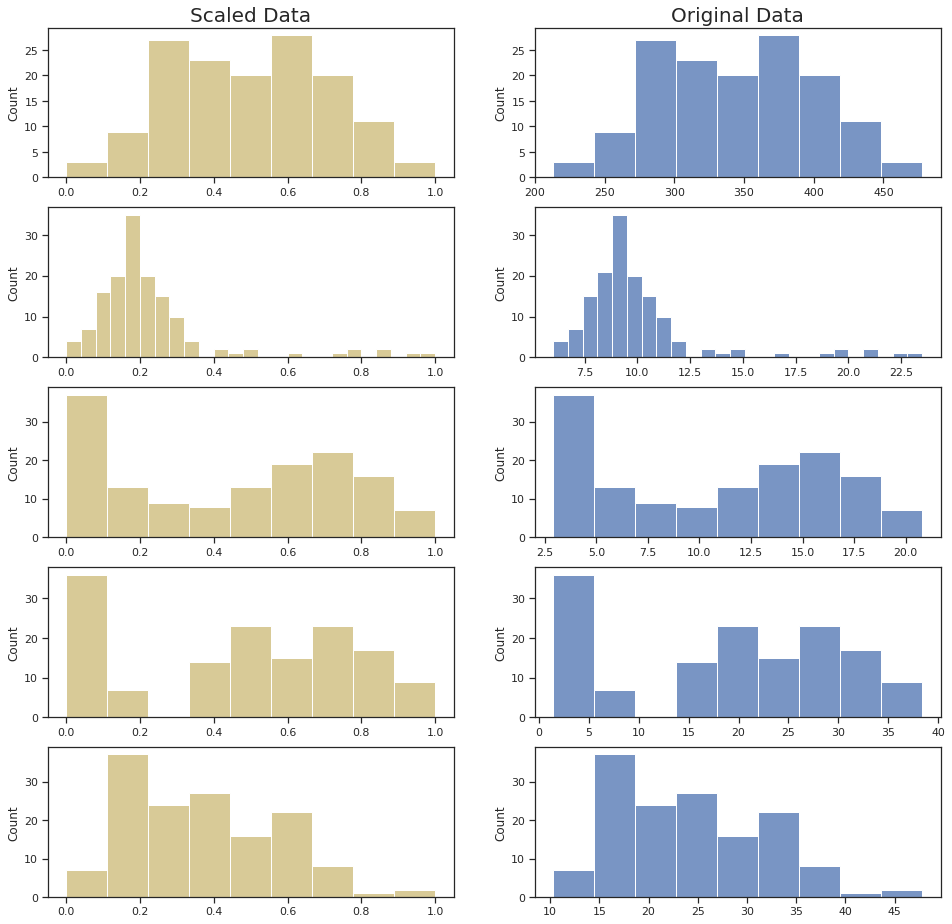

In [ ]:
# 0 Import a scaler from sklearn
from sklearn.preprocessing import minmax_scale
this 
# 1 mix-max scale the data between 0 and 1
X_scaled = minmax_scale(X)

# 2 Confirm that the distributions' shapes are unchanged by plotting them together
# 2a Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# 2b Plot both distributions together and compare
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(16,16))
sns.histplot(X_scaled[:,0], ax=ax[0,0], color='y')
ax[0,0].set_title("Scaled Data", fontsize=20)
sns.histplot(X[:,0], ax=ax[0,1])
ax[0,1].set_title("Original Data", fontsize=20)
sns.histplot(X_scaled[:,1], ax=ax[1,0], color='y')
sns.histplot(X[:,1], ax=ax[1,1])
sns.histplot(X_scaled[:,2], ax=ax[2,0], color='y')
sns.histplot(X[:,2], ax=ax[2,1])
sns.histplot(X_scaled[:,3], ax=ax[3,0], color='y')
sns.histplot(X[:,3], ax=ax[3,1])
sns.histplot(X_scaled[:,4], ax=ax[4,0], color='y')
sns.histplot(X[:,4], ax=ax[4,1])
plt.show()

# Technical Note: that the y-axis in a density plot is the probability density function for the kernel density estimation.

### 4.4.1 Let's build/train our KNN model again - this time with the re-scaled variables 

In [ ]:
# 1 Split sample into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4 ,random_state=21, stratify=y)

# 2 Import the k-nearest neighbors classifier from sci-kit learn
from sklearn.neighbors import KNeighborsClassifier

# 3 Instantiate the KNeighborsClassifier with a n_neighbors value of 4
knn = KNeighborsClassifier(n_neighbors=4)

# 4 Fit the model
knn.fit(X_train, y_train)

# 5 Make the prediction for the test set
y_pred = knn.predict(X_test)

# 6 And calculate the accuracy
print("Accuracy of Predicition: {:2f}".format(knn.score(X_test, y_test)))

Accuracy of Predicition: 0.982759


# **Looking Ahead:**  


####**Next Class:** Tuesday, Feb 28, 2023

#### ***Business Application:*** Loan Default Prediction with Tree-Based Models


#### **Reading** before class: none